# Python for data analysis
Athena Hadjixenofontos, PhD
## A (slightly) deeper dive into descriptive statistics and hypothesis testing

In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Seaborn 
import seaborn as sns

# Scipy modules need to be imported separately 
import scipy.stats as ss

# Import the dataset
data = pd.read_csv('../data/U.S._Chronic_Disease_Indicators__CDI_mod.csv', 
                       sep = ',', 
                       dtype={'YearStart' : np.int64,
                              'YearEnd' : np.int64, 
                              'LocationAbbr' : str,
                              'LocationDesc' : str,
                              'DataSource' : str, 
                              'Topic' : str,
                              'Question' : str,
                              'DataValueUnit' : str,
                              'DataValueType' : str,
                              'DataValue' : str,
                              'DataValueAlt' : np.float64,
                              'DataValueFootnoteSymbol' : str,
                              'DataValueFootnote' : str,
                              'LowConfidenceLimit' : np.float64,
                              'HighConfidenceLimit' : np.float64,
                              'StratificationCategory' : str,
                              'Stratification' : str,
                              'GeoLocation'  : str,
                             })

## Focusing the question

The first thing we need to do is focus our question. In order to do that let's take another look at the Topics on which we have data. 

In [ ]:
# Choose phenotypes to study
data.Topic.value_counts()

In [ ]:
# Let's see the same information in a barplot
sns.countplot(y = 'Topic', data = data, palette = 'Set3')
plt.show()

**Review exercise:** Create a new DataFrame, saved to a variable called 'immune' that contains only data on Asthma and Immunization topics. What are the dimensions of this new 2D DataFrame? 

**Review exercise:** Print out the unique sets of questions that are present in the immmune dataset under each of the two topics. 

Hm, all the questions that we can ask are still too wide. Let's restrict our analysis to specific measures (DataValueType) for specific populations (Stratification1). 

**Review exercise:** Write a couple of print statements that will give you the measures and populations that we can choose from. 

Age-adjusted prevalence is one of the measures that the CDC has included in this dataset. 

**Question:** Why do we care to adjust prevalence for age? How is it different than crude prevalence? 

**Review exercise:** Okay, so now that you have taken a fresh look at the measures, populations available, create a new DataFrame that contains only observations on Age-adjusted Prevalence for only the race and ethnicity-related populations in our immune dataset. 

## Descriptive statistics with respect to the question of interest

How do the various racial and ethnic groups compare in age-adjusted prevalence of asthma and immunization measures
across *all questions* and across *all locations* in the immune_clean dataset?

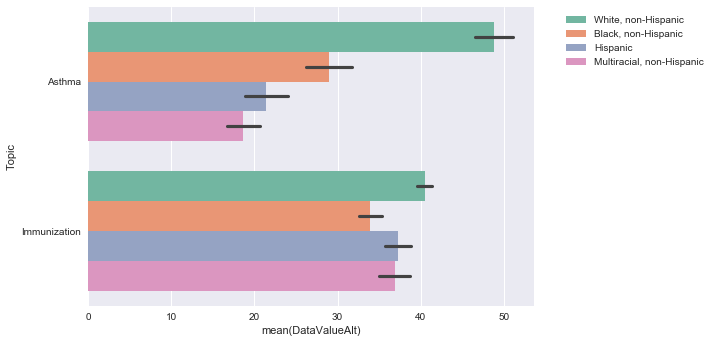

In [62]:
sns.barplot(data = immune_clean, x = 'DataValueAlt', y = 'Topic', hue = 'Stratification1', palette = 'Set2')

# Because seaborn is built on top of matplotlib, 
# you can use matplotlib's plt.legends to control the position of the legend
plt.legend(bbox_to_anchor = (1.05, 1))
plt.show()

Take a moment to link out and read through the [customizing matplotlib page](http://matplotlib.org/users/customizing.html) in the documentation. 

**Exercise:** How do the various racial and ethnic groups compare in age-adjusted prevalence of:
* asthma mortality?
* current asthma prevalence among adults aged >= 18 years

Make barplots of these two variables to get an idea of the differenced between age-adjusted prevalence of these outcomes in these groups. 

**Question:** Is this plot meaningful enough to conclude differences between the groups? Why, or why not? 

**Exercise**: Make a scatterplot, using any library you want, with the age-adjusted prevalence of Influenza vaccination among noninstitutionalized adults aged 18-64 years with asthma on the one axis and the age-adjusted prevalence of Emergency visits for asthma on the other axis, where each observation is a point. Use different symbols to represent the race/ethicity and different colors to represent the location. 

**Question:** What do scatterplots represent? What types of variables can you use them for? 

**Question:** Is there a clear relationship between the two variables? Do states that have higher rates of influenza vaccination of adults with asthma also have higher rates of emergency room visits related to asthma? 

**Question:** Come up with a few reasons why you may not believe that a relationship exists between the two variables, and also come up with a few reasons why a true relationship between these variables may be reasonable. 

**Question:** How do you know that what you see is representative of the population parameter and not a consequence of "bad" sampling? 

## Correlation

Thus far we have talked about quantities of the marginal distribution such as the mean and standard deviation. The correlation between two variables is a measure of how they vary together. It is a property of their joint distribution. 

**Exercise:** Calculate the Pearson correlation between two variables. Use the pandas.Series.corr() method (although this is not your only option). 

You will first need to subset two Series objects that are comparable. Calculate the Pearson correlation between asthma mortality rate in White, non-Hispanics and Influenza vaccination among noninstitutionalized adults aged >= 18 years. 

![alt text](correlation.png "xkcd: Correlation")

## Population parameters and sample estimates

In a perfect world, where we could measure every member of a population, our sample estimate would be equal to the population parameter. 

Alas, the population parameter for our variable of interest is something that we will never know, but it is someting that we can estimate from data, with varying levels of confidence. 

The larger the sample size, the closer you generally get to the population parameter, therefore when designing a study you should always aim to maximize your sample size. The restrictions will be imposed by practical matters, like budget, time and effort it takes to generate/collect a sample. 

Sample size calculations come in handy for these purposes. 

**Question:** What does detecting a true difference between two groups depend on? 

## Hypothesis testing: is anything real? 

Welcome to the universe of inferential statistics. 

We'll start with something simple: a two-sample t-test. We will ask the question:

Is the age-adjusted prevalence of asthma related mortality different between Black, non-Hispanic and White, non-Hispanic individuals?

**Exercise:** Perform a two-sample t-test to test whether the difference in mean current asthma prevalence is significant. 

At your disposal: np.mean() and stats.ttest_ind()